# 팀 미션 담당 2번, 공통(5번)

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [121]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


판매유형별
면세점 이외    2772
Name: count, dtype: int64

In [122]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


판매유형별
면세점 이외    2772
Name: count, dtype: int64

In [131]:
df

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033
...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278
2768,기타,기 타,면세점 이외,2021.3/4,1154
2769,기타,기 타,면세점 이외,2021.4/4,1076
2770,기타,기 타,면세점 이외,2022.1/4,2325


In [148]:
# df["시점"]
# type(.split()[0])
int("2022.2/4 p)".split(".")[0])

2022

In [149]:
df["시점"].map(lambda x : x.split(".")[0])

0       2017
1       2017
2       2017
3       2017
4       2018
        ... 
2767    2021
2768    2021
2769    2021
2770    2022
2771    2022
Name: 시점, Length: 2772, dtype: object

In [170]:
df["연도"] = df["시점"].map(lambda x : int(x.split(".")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [154]:
"2022.1/4".split(".")[1].split("/")[0]

'1'

In [157]:
df["분기"] = df["시점"].map(lambda x : int(x.split(".")[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [161]:
df.rename(columns={"데이터" : "백만"}, inplace=True)
df

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [171]:
df["연도"]

0       2017
1       2017
2       2017
3       2017
4       2018
        ... 
2767    2021
2768    2021
2769    2021
2770    2022
2771    2022
Name: 연도, Length: 2772, dtype: int64

In [172]:
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.


In [175]:
df = df.drop(columns=['시점'])

In [176]:
df

,국가(대륙)별,상품군별,판매유형별,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2033,2018,1
...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,1278,2021,2
2768,기타,기 타,면세점 이외,1154,2021,3
2769,기타,기 타,면세점 이외,1076,2021,4
2770,기타,기 타,면세점 이외,2325,2022,1


In [185]:
pivot_table = df.pivot_table(index='국가(대륙)별', columns='연도', values='백만', aggfunc='sum')
pivot_table

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


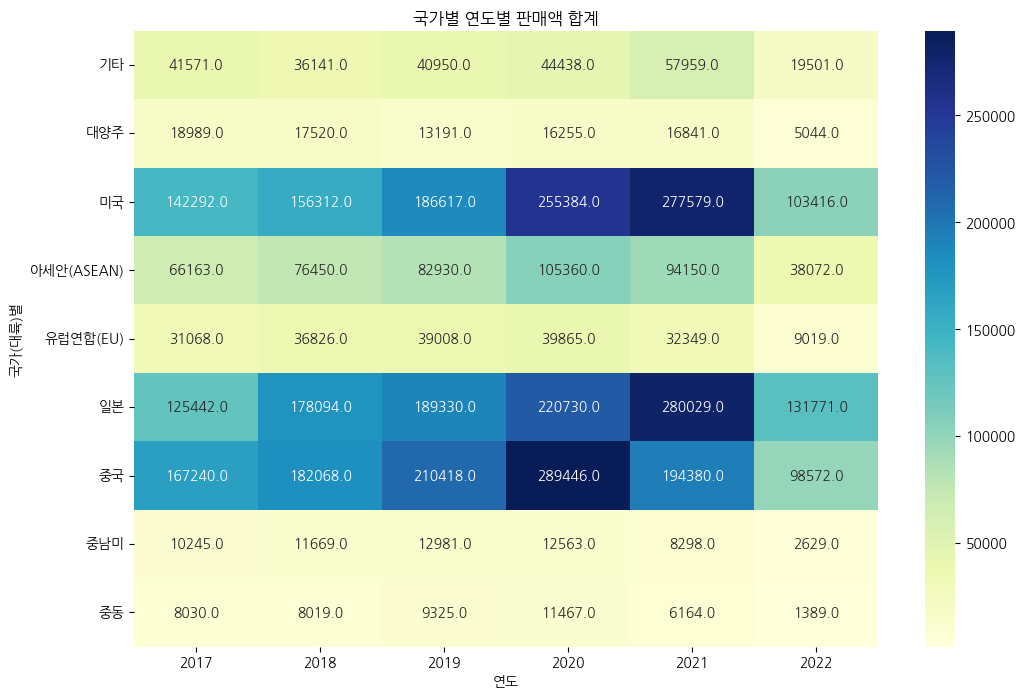

In [189]:
# 히트맵 생성
plt.figure(figsize=(12, 8))  # 그림의 크기 설정
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlGnBu')  # annot=True는 셀에 숫자를 표시하며 fmt는 숫자 형식 지정, cmap은 색상 맵 설정

# 그래프 제목과 레이블 설정
plt.title('국가별 연도별 판매액 합계')
plt.xlabel('연도')
plt.ylabel('국가(대륙)별')

# 그래프 표시
plt.show()

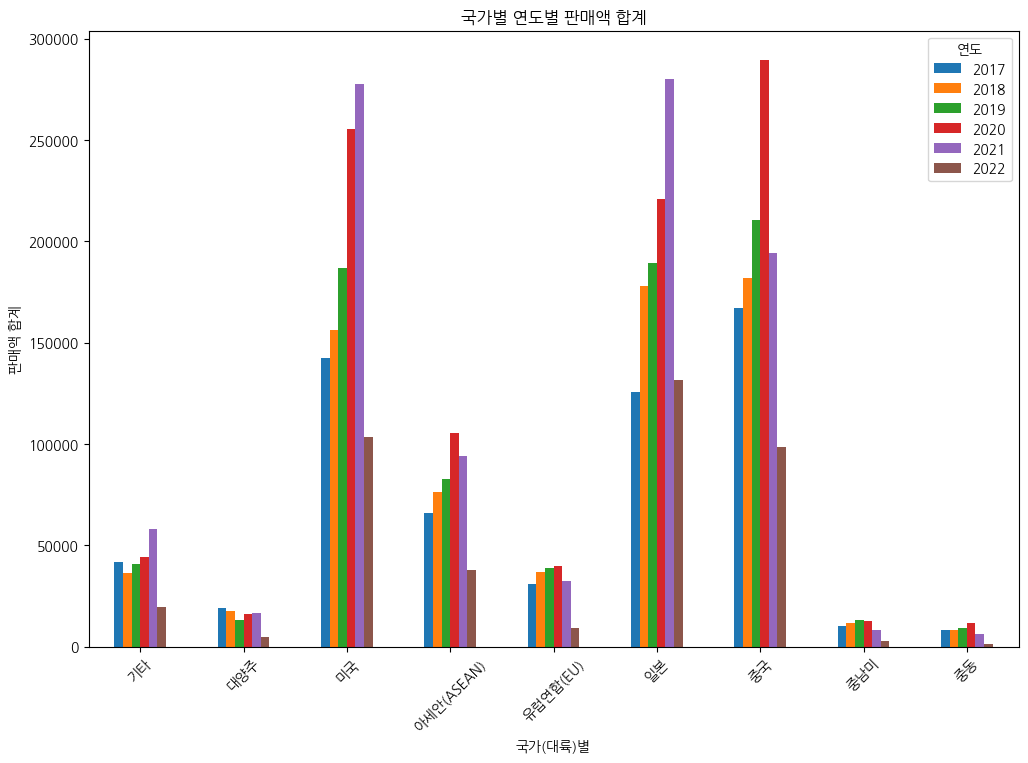

In [196]:
# 막대 그래프 생성
pivot_table.plot(kind='bar', figsize=(12, 8))

plt.xticks(rotation=45)

# 그래프 제목과 레이블 설정
plt.title('국가별 연도별 판매액 합계')
plt.xlabel('국가(대륙)별')
plt.ylabel('판매액 합계')

# 범례 표시
plt.legend(title='연도')

# 그래프 표시
plt.show()

In [202]:
df_new = pd.read_csv("/Users/hyunmyeong/Desktop/데이터분석_코칭스터디/data/정보보호산업_매출현황_20231029211100.csv"
                    , encoding="cp949")

In [206]:
df_new

,산업명,산업별(2),산업별(3),2021,2022
0,정보보안,정보보안 제품(솔루션),네트워크보안 솔루션,943201,1508712
1,정보보안,정보보안 제품(솔루션),엔드포인트보안 솔루션,614592,555613
2,정보보안,정보보안 제품(솔루션),플랫폼보안/보안관리 솔루션,197830,381463
3,정보보안,정보보안 제품(솔루션),클라우드보안 솔루션,78623,359164
4,정보보안,정보보안 제품(솔루션),컨텐츠/데이터보안 솔루션,612153,612459
5,정보보안,정보보안 제품(솔루션),공통인프라보안 솔루션,676657,590198
6,정보보안,정보보안 관련 서비스,보안컨설팅,501012,572644
7,정보보안,정보보안 관련 서비스,보안시스템 유지관리/ 보안성 지속 서비스,416134,540244
8,정보보안,정보보안 관련 서비스,보안관제 서비스,400206,401337
9,정보보안,정보보안 관련 서비스,보안교육 및 훈련 서비스,5645,17919


In [205]:
df_new.rename(columns={"산업별(1)" : "산업명"}, inplace=True)
df_new

,산업명,산업별(2),산업별(3),2021,2022
0,정보보안,정보보안 제품(솔루션),네트워크보안 솔루션,943201,1508712
1,정보보안,정보보안 제품(솔루션),엔드포인트보안 솔루션,614592,555613
2,정보보안,정보보안 제품(솔루션),플랫폼보안/보안관리 솔루션,197830,381463
3,정보보안,정보보안 제품(솔루션),클라우드보안 솔루션,78623,359164
4,정보보안,정보보안 제품(솔루션),컨텐츠/데이터보안 솔루션,612153,612459
5,정보보안,정보보안 제품(솔루션),공통인프라보안 솔루션,676657,590198
6,정보보안,정보보안 관련 서비스,보안컨설팅,501012,572644
7,정보보안,정보보안 관련 서비스,보안시스템 유지관리/ 보안성 지속 서비스,416134,540244
8,정보보안,정보보안 관련 서비스,보안관제 서비스,400206,401337
9,정보보안,정보보안 관련 서비스,보안교육 및 훈련 서비스,5645,17919


In [207]:
df_new.rename(columns={"산업별(2)" : "산업명구분" , "산업별(3)" : "상세명"}, inplace=True)
df_new

,산업명,산업명구분,상세명,2021,2022
0,정보보안,정보보안 제품(솔루션),네트워크보안 솔루션,943201,1508712
1,정보보안,정보보안 제품(솔루션),엔드포인트보안 솔루션,614592,555613
2,정보보안,정보보안 제품(솔루션),플랫폼보안/보안관리 솔루션,197830,381463
3,정보보안,정보보안 제품(솔루션),클라우드보안 솔루션,78623,359164
4,정보보안,정보보안 제품(솔루션),컨텐츠/데이터보안 솔루션,612153,612459
5,정보보안,정보보안 제품(솔루션),공통인프라보안 솔루션,676657,590198
6,정보보안,정보보안 관련 서비스,보안컨설팅,501012,572644
7,정보보안,정보보안 관련 서비스,보안시스템 유지관리/ 보안성 지속 서비스,416134,540244
8,정보보안,정보보안 관련 서비스,보안관제 서비스,400206,401337
9,정보보안,정보보안 관련 서비스,보안교육 및 훈련 서비스,5645,17919


In [208]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   산업명     25 non-null     object
 1   산업명구분   25 non-null     object
 2   상세명     25 non-null     object
 3   2021    25 non-null     object
 4   2022    25 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [212]:
df_new.rename(columns={"2021" : "2021년" , "2022" : "2022년"}, inplace=True)
df_new

,산업명,산업명구분,상세명,2021년,2022년
0,정보보안,정보보안 제품(솔루션),네트워크보안 솔루션,943201,1508712
1,정보보안,정보보안 제품(솔루션),엔드포인트보안 솔루션,614592,555613
2,정보보안,정보보안 제품(솔루션),플랫폼보안/보안관리 솔루션,197830,381463
3,정보보안,정보보안 제품(솔루션),클라우드보안 솔루션,78623,359164
4,정보보안,정보보안 제품(솔루션),컨텐츠/데이터보안 솔루션,612153,612459
5,정보보안,정보보안 제품(솔루션),공통인프라보안 솔루션,676657,590198
6,정보보안,정보보안 관련 서비스,보안컨설팅,501012,572644
7,정보보안,정보보안 관련 서비스,보안시스템 유지관리/ 보안성 지속 서비스,416134,540244
8,정보보안,정보보안 관련 서비스,보안관제 서비스,400206,401337
9,정보보안,정보보안 관련 서비스,보안교육 및 훈련 서비스,5645,17919


In [214]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   산업명     25 non-null     object
 1   산업명구분   25 non-null     object
 2   상세명     25 non-null     object
 3   2021년   25 non-null     object
 4   2022년   25 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [224]:
# "2021년" 컬럼에서 "-"을 0으로 대체하여 업데이트
df_new["2021년"] = df_new["2021년"].replace("-", 0)

In [225]:
# '2021년' 컬럼의 데이터 유형을 int로 변경
df_new['2021년'] = df_new['2021년'].astype(int)

In [228]:
df_new.info()
df_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   산업명     25 non-null     object
 1   산업명구분   25 non-null     object
 2   상세명     25 non-null     object
 3   2021년   25 non-null     int64 
 4   2022년   25 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ KB


,산업명,산업명구분,상세명,2021년,2022년
0,정보보안,정보보안 제품(솔루션),네트워크보안 솔루션,943201,1508712
1,정보보안,정보보안 제품(솔루션),엔드포인트보안 솔루션,614592,555613
2,정보보안,정보보안 제품(솔루션),플랫폼보안/보안관리 솔루션,197830,381463
3,정보보안,정보보안 제품(솔루션),클라우드보안 솔루션,78623,359164
4,정보보안,정보보안 제품(솔루션),컨텐츠/데이터보안 솔루션,612153,612459
5,정보보안,정보보안 제품(솔루션),공통인프라보안 솔루션,676657,590198
6,정보보안,정보보안 관련 서비스,보안컨설팅,501012,572644
7,정보보안,정보보안 관련 서비스,보안시스템 유지관리/ 보안성 지속 서비스,416134,540244
8,정보보안,정보보안 관련 서비스,보안관제 서비스,400206,401337
9,정보보안,정보보안 관련 서비스,보안교육 및 훈련 서비스,5645,17919


In [230]:
df_new["판매액변화"] = df_new["2022년"] - df_new["2021년"]

In [231]:
df_new.sort_values(by="판매액변화",ascending=False)

,산업명,산업명구분,상세명,2021년,2022년,판매액변화
0,정보보안,정보보안 제품(솔루션),네트워크보안 솔루션,943201,1508712,565511
17,물리보안,물리보안 제품(솔루션),출입통제 장비,556695,1087675,530980
18,물리보안,물리보안 제품(솔루션),생체인식 보안시스템,478910,987022,508112
15,물리보안,물리보안 제품(솔루션),물리보안 솔루션,419842,764675,344833
3,정보보안,정보보안 제품(솔루션),클라우드보안 솔루션,78623,359164,280541
24,물리보안,물리보안관련 서비스,기타보안 서비스,516400,782115,265715
2,정보보안,정보보안 제품(솔루션),플랫폼보안/보안관리 솔루션,197830,381463,183633
16,물리보안,물리보안 제품(솔루션),물리보안 주변장비,161775,286299,124524
7,정보보안,정보보안 관련 서비스,보안시스템 유지관리/ 보안성 지속 서비스,416134,540244,124110
12,물리보안,물리보안 제품(솔루션),보안용 카메라,1656579,1742824,86245


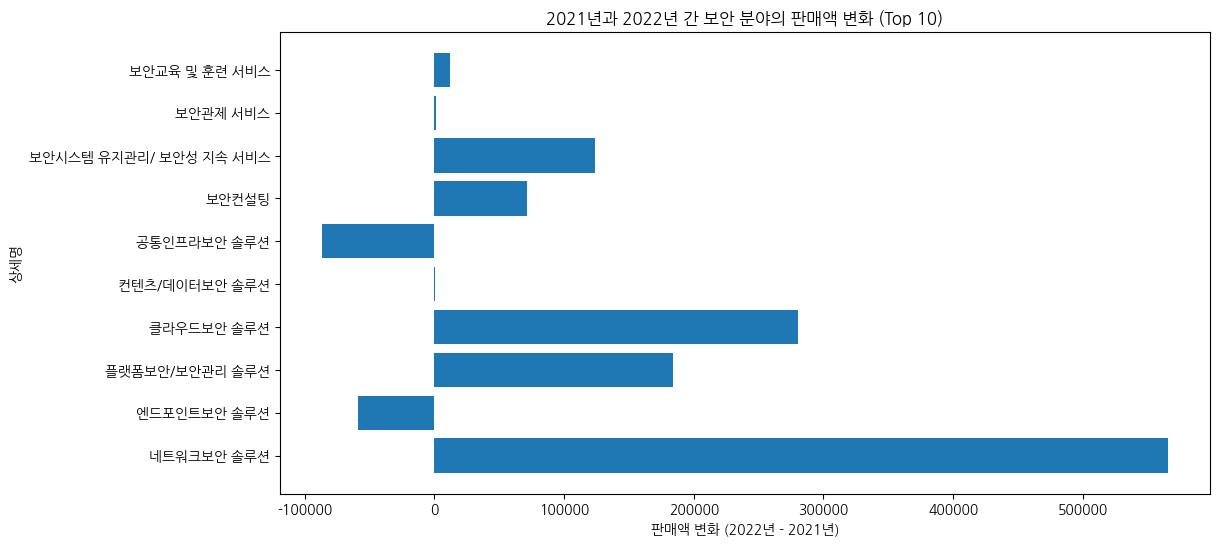

In [233]:
N = 10  # 상위 N개 항목
top_N = df_new.head(N)

plt.figure(figsize=(12, 6))
plt.barh(top_N['상세명'], top_N['판매액변화'])
plt.xlabel('판매액 변화 (2022년 - 2021년)')
plt.ylabel('상세명')
plt.title('2021년과 2022년 간 보안 분야의 판매액 변화 (Top 10)')
plt.show()

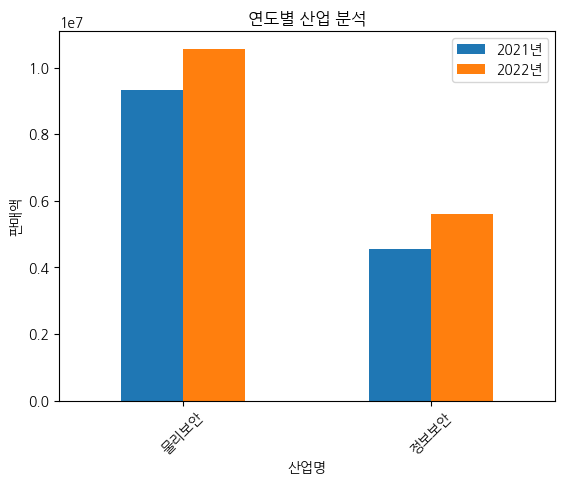

In [235]:
# 연도별 산업 분석을 위한 그룹화
yearly_analysis = df_new.groupby('산업명')[['2021년', '2022년']].sum()

# 또는 막대 그래프로 시각화
yearly_analysis.plot(kind='bar')
plt.title('연도별 산업 분석')
plt.xlabel('산업명')
plt.ylabel('판매액')
plt.xticks(rotation=45)
plt.show()

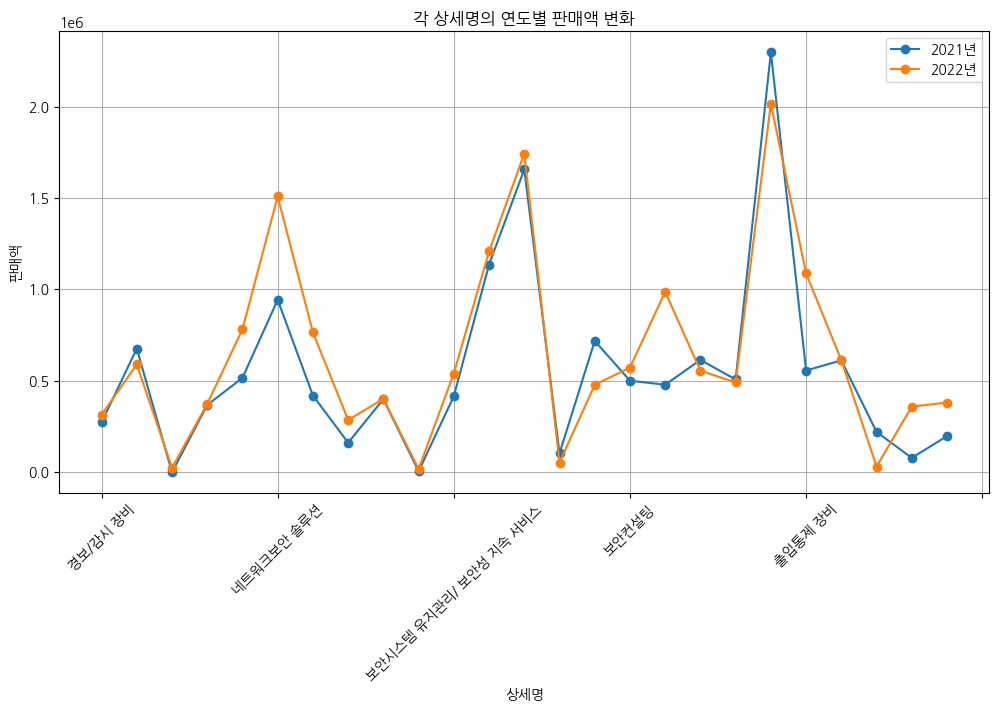

In [236]:
# 각 상세명의 연도별 판매액 분석을 위한 그룹화
detail_analysis = df_new.pivot_table(index='상세명', values=['2021년', '2022년'], aggfunc='sum')

# 선 그래프로 각 상세명의 판매액 변화 시각화
detail_analysis.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('각 상세명의 연도별 판매액 변화')
plt.xlabel('상세명')
plt.ylabel('판매액')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()